In [1]:
#Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# %%
## Reading the csv file
## To read the csv file and create a data frame I used pandas ".read_csv" function.

In [4]:
Sales_df=pd.read_csv('walmart.csv')
Sales_df.shape

(6435, 7)

In [5]:

### Cleaning Data
### After checking the data in excel sheet there wasn't much to clean but just be sure that data is ready 
### to use I will use drop NA function to make the data ready. 

In [6]:
Sales_df=Sales_df.dropna(axis=0)
Sales_df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,46.50,2.625,211.350143,8.106


In [7]:
# %%
## Understanding data
## Understanding data by checking the shape, checking null values, looking at data info, and Describing the data set.
## Checking the shape of data.

In [8]:
Sales_df.shape


(6435, 7)

In [9]:
## Looking at Data info
Sales_df.info
## Describing the data
Sales_df.describe()
## Checking for null value in the dataset
Sales_df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
## Feature Exploration
## I am trying look at the various feartures and figure out if their is any trend in them.
## I will plot a line plot of features to indentify the trend.

C:\Users\kush2\AppData\Local\Temp\ipykernel_1172\2400482271.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = Sales_df, x = Sales_df["Date"], y = Sales_df['Weekly_Sales'], ci=False,lw=2  )
C:\Users\kush2\AppData\Local\Temp\ipykernel_1172\2400482271.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = Sales_df, x = Sales_df["Date"], y = Sales_df['Temperature'],ci=False,lw=2 )
C:\Users\kush2\AppData\Local\Temp\ipykernel_1172\2400482271.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = Sales_df, x = Sales_df["Date"], y = Sales_df['CPI'],ci=False,lw=2)
C:\Users\kush2\AppData\Local\Temp\ipykernel_1172\2400482271.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = Sales_df, x = S

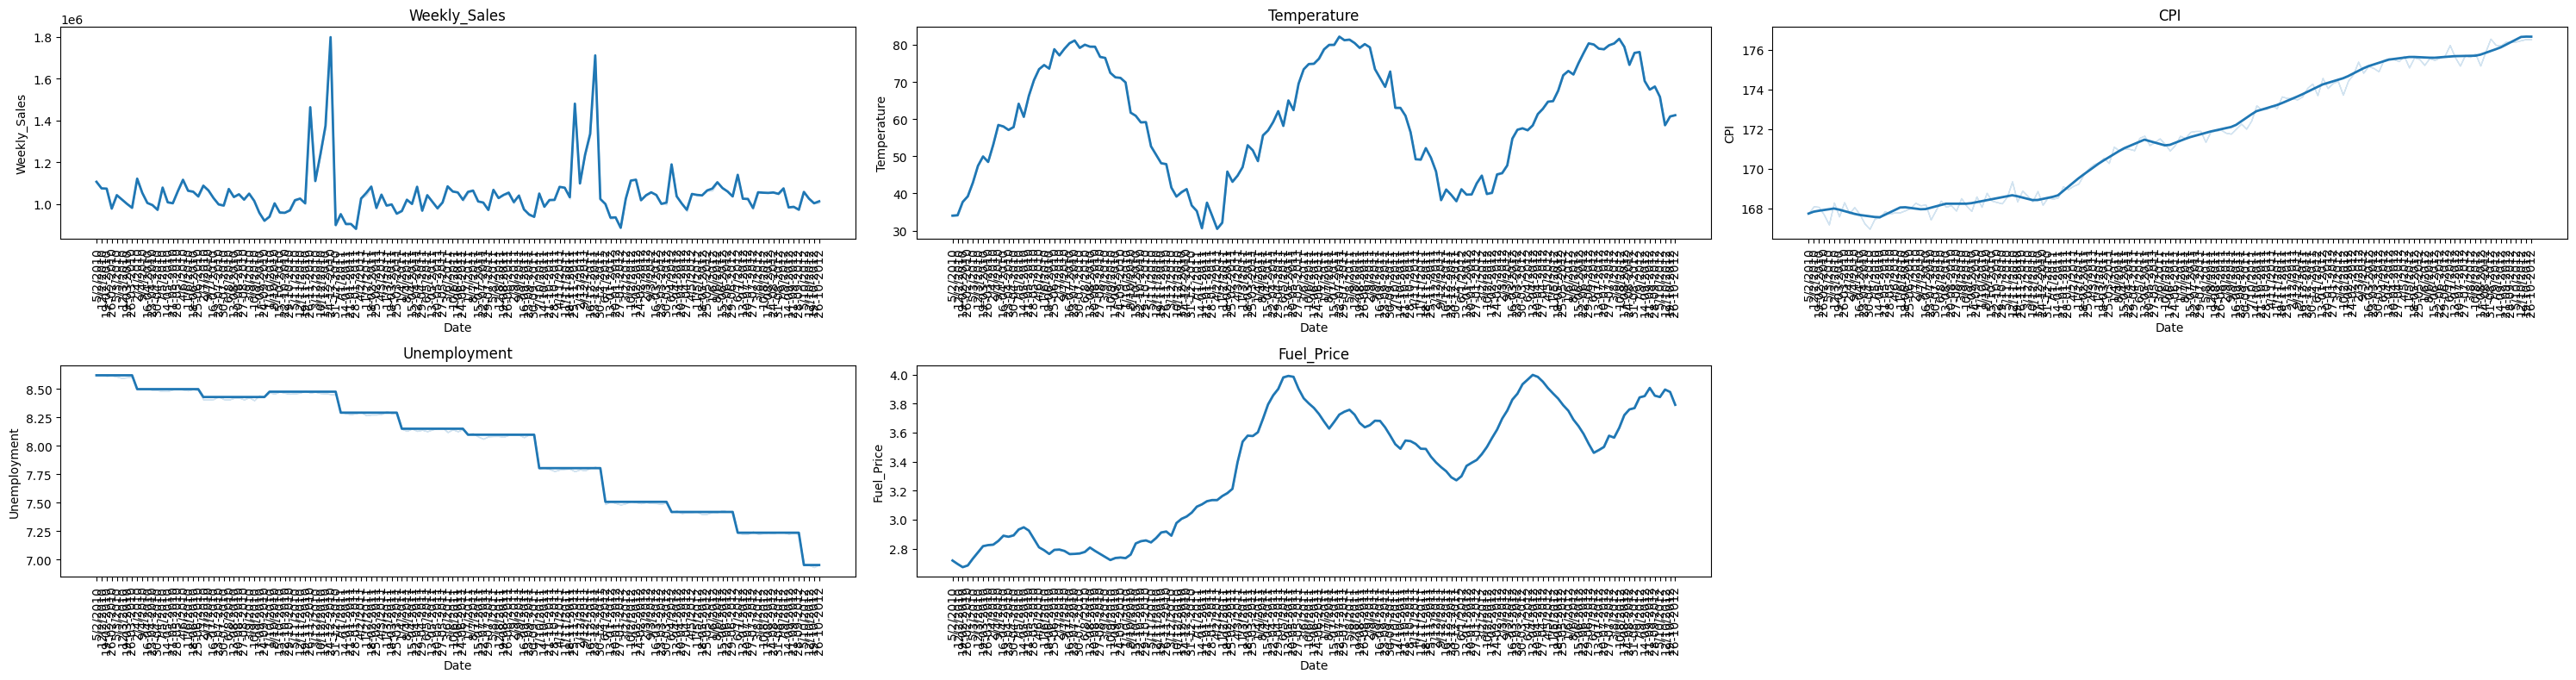

In [11]:
## Line plot of the features
fig = plt.figure(figsize=(30,8))
plt.subplot(231)
plt.title('Weekly_Sales')
sns.lineplot(data = Sales_df, x = Sales_df["Date"], y = Sales_df['Weekly_Sales'], ci=False,lw=2  )
plt.xticks(rotation =90)
plt.tight_layout()

plt.subplot(232)
plt.title('Temperature')
sns.lineplot(data = Sales_df, x = Sales_df["Date"], y = Sales_df['Temperature'],ci=False,lw=2 )
plt.xticks(rotation =90)
plt.tight_layout()

plt.subplot(233)
plt.title('CPI')
sns.lineplot(data = Sales_df, x = Sales_df["Date"], y = Sales_df['CPI'],ci=False,lw=2)
plt.xticks(rotation =90)
plt.tight_layout()

plt.subplot(234)
plt.title('Unemployment')
sns.lineplot(data = Sales_df, x = Sales_df["Date"], y =Sales_df['Unemployment'],ci=False,lw=2)
plt.xticks(rotation =90)
plt.tight_layout()

plt.subplot(235)
plt.title('Fuel_Price')
sns.lineplot(data = Sales_df, x = Sales_df["Date"], y = Sales_df['Fuel_Price'],ci=False,lw=2)
plt.xticks(rotation =90)
plt.tight_layout()



In [12]:
## From the line graph we can see the following things.
## 1) The weekly sales are stable over given period of time with slight decilned trend, the weekly sales also have a seasonality rise every year.
## 2) The tempreture shows a cyclic pattern or seasonality.
## 3) Fuel prices have upward trend in them with some high variance.
## 4) CPI that is consumer purchase Index has a steady upward trend.
## 5) Unemplyoment has a steady downward trend, which says that the unemployment rate is reducing.


In [13]:
## Removing outliers from data.
## Removing outliers from the features will help in

## Checking outliers with the help of Boxplot


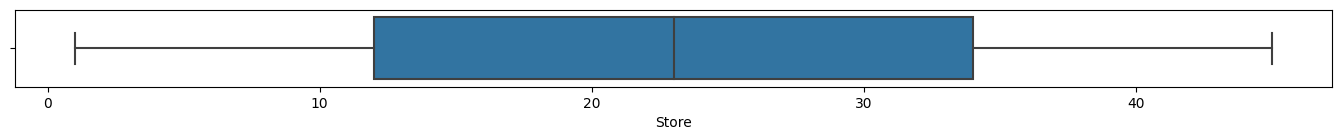

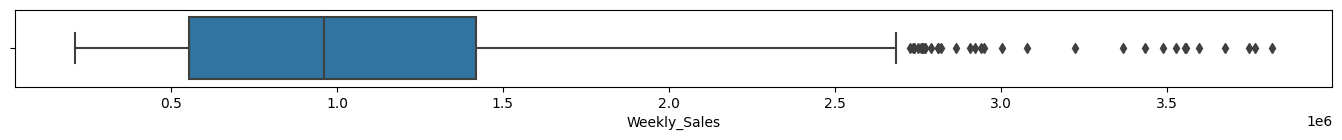

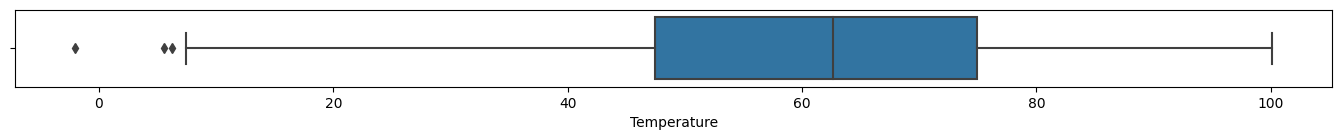

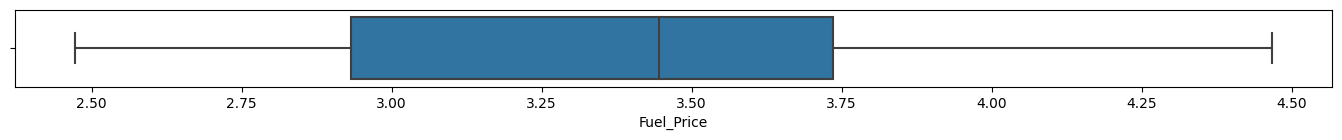

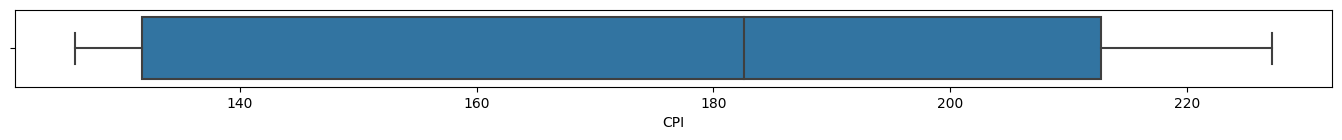

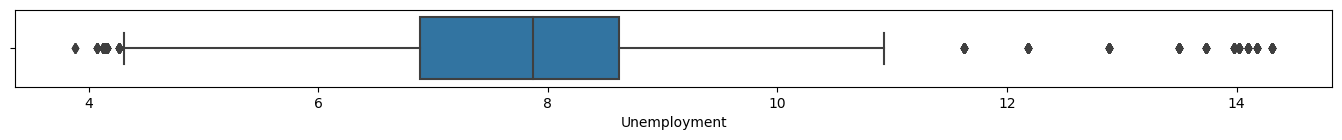

In [14]:
Sales_df.drop(columns="Date" , inplace = True)
for column in Sales_df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=Sales_df, x=column)
## From the box plot weekly sales, Tempreture and Unemployment have outliners, there ouliner needs to be removed for better prediction.


In [15]:
## Outliers should be removed for better model, ouliers can influence the model due to their extreme values.
##
## Removing Outliers by using lower wihisker and upper whisker.

capping the  Store
capping the  Weekly_Sales
capping the  Temperature
capping the  Fuel_Price
capping the  CPI
capping the  Unemployment


C:\Users\kush2\AppData\Local\Temp\ipykernel_1172\3098371047.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_df[col][Sales_df[col] <= percentiles[0]] = percentiles[0]
C:\Users\kush2\AppData\Local\Temp\ipykernel_1172\3098371047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_df[col][Sales_df[col] >= percentiles[1]] = percentiles[1]


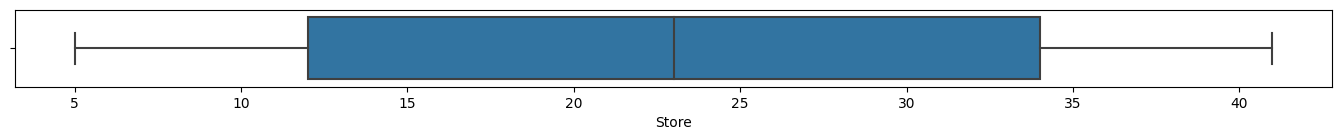

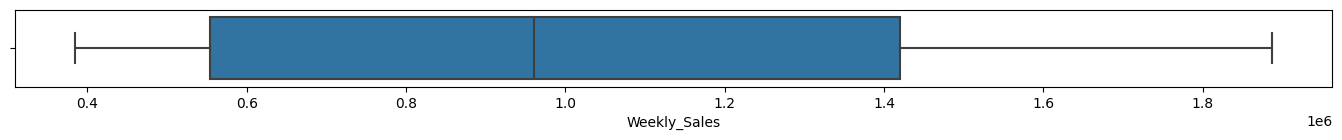

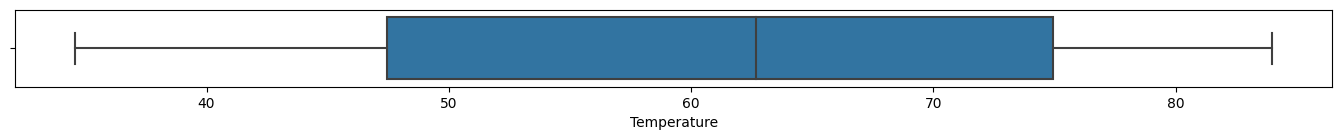

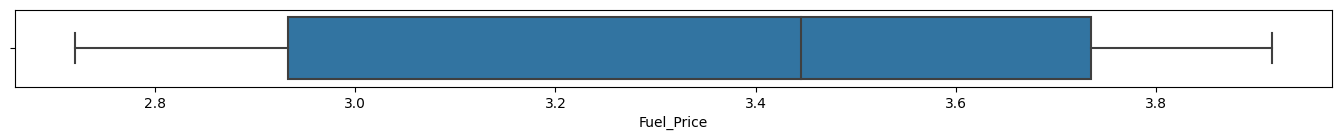

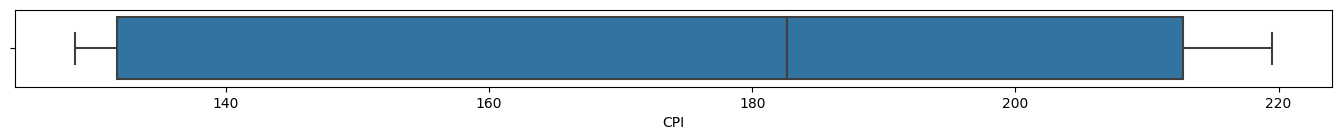

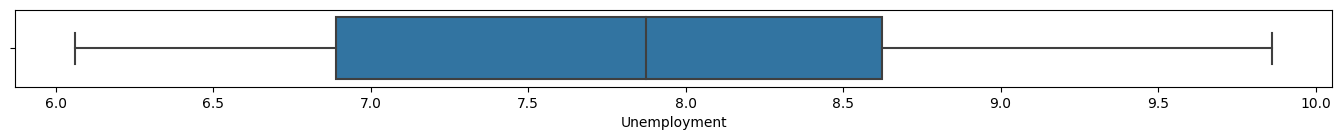

In [16]:
def cap_data(Sales_df):
    for col in Sales_df.columns:
        print("capping the ",col)
        if (((Sales_df[col].dtype)=='float64') | ((Sales_df[col].dtype)=='int64')):
            percentiles = Sales_df[col].quantile([0.1,0.9]).values
            Sales_df[col][Sales_df[col] <= percentiles[0]] = percentiles[0]
            Sales_df[col][Sales_df[col] >= percentiles[1]] = percentiles[1]
        else:
            Sales_df[col]=Sales_df[col]
    return Sales_df
Sales_df=cap_data(Sales_df)

for column in Sales_df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=Sales_df, x=column)


In [17]:
# %%
## Feature Exploration and Feature selection.
## Understanding the features that are involved in affecting the sales. This can be done by understanding the corelation.
## To find which features are relevant fo our model we have various methods like drop constant feature, using pearson correlation and etc.
## For my project I chose pearson corelation and in this we can use sognle feature instead of multiple features that have correlation of over 90%.
## This will help us to avoid overfitting the model.

Text(0.5, 1.0, 'correlation between features')

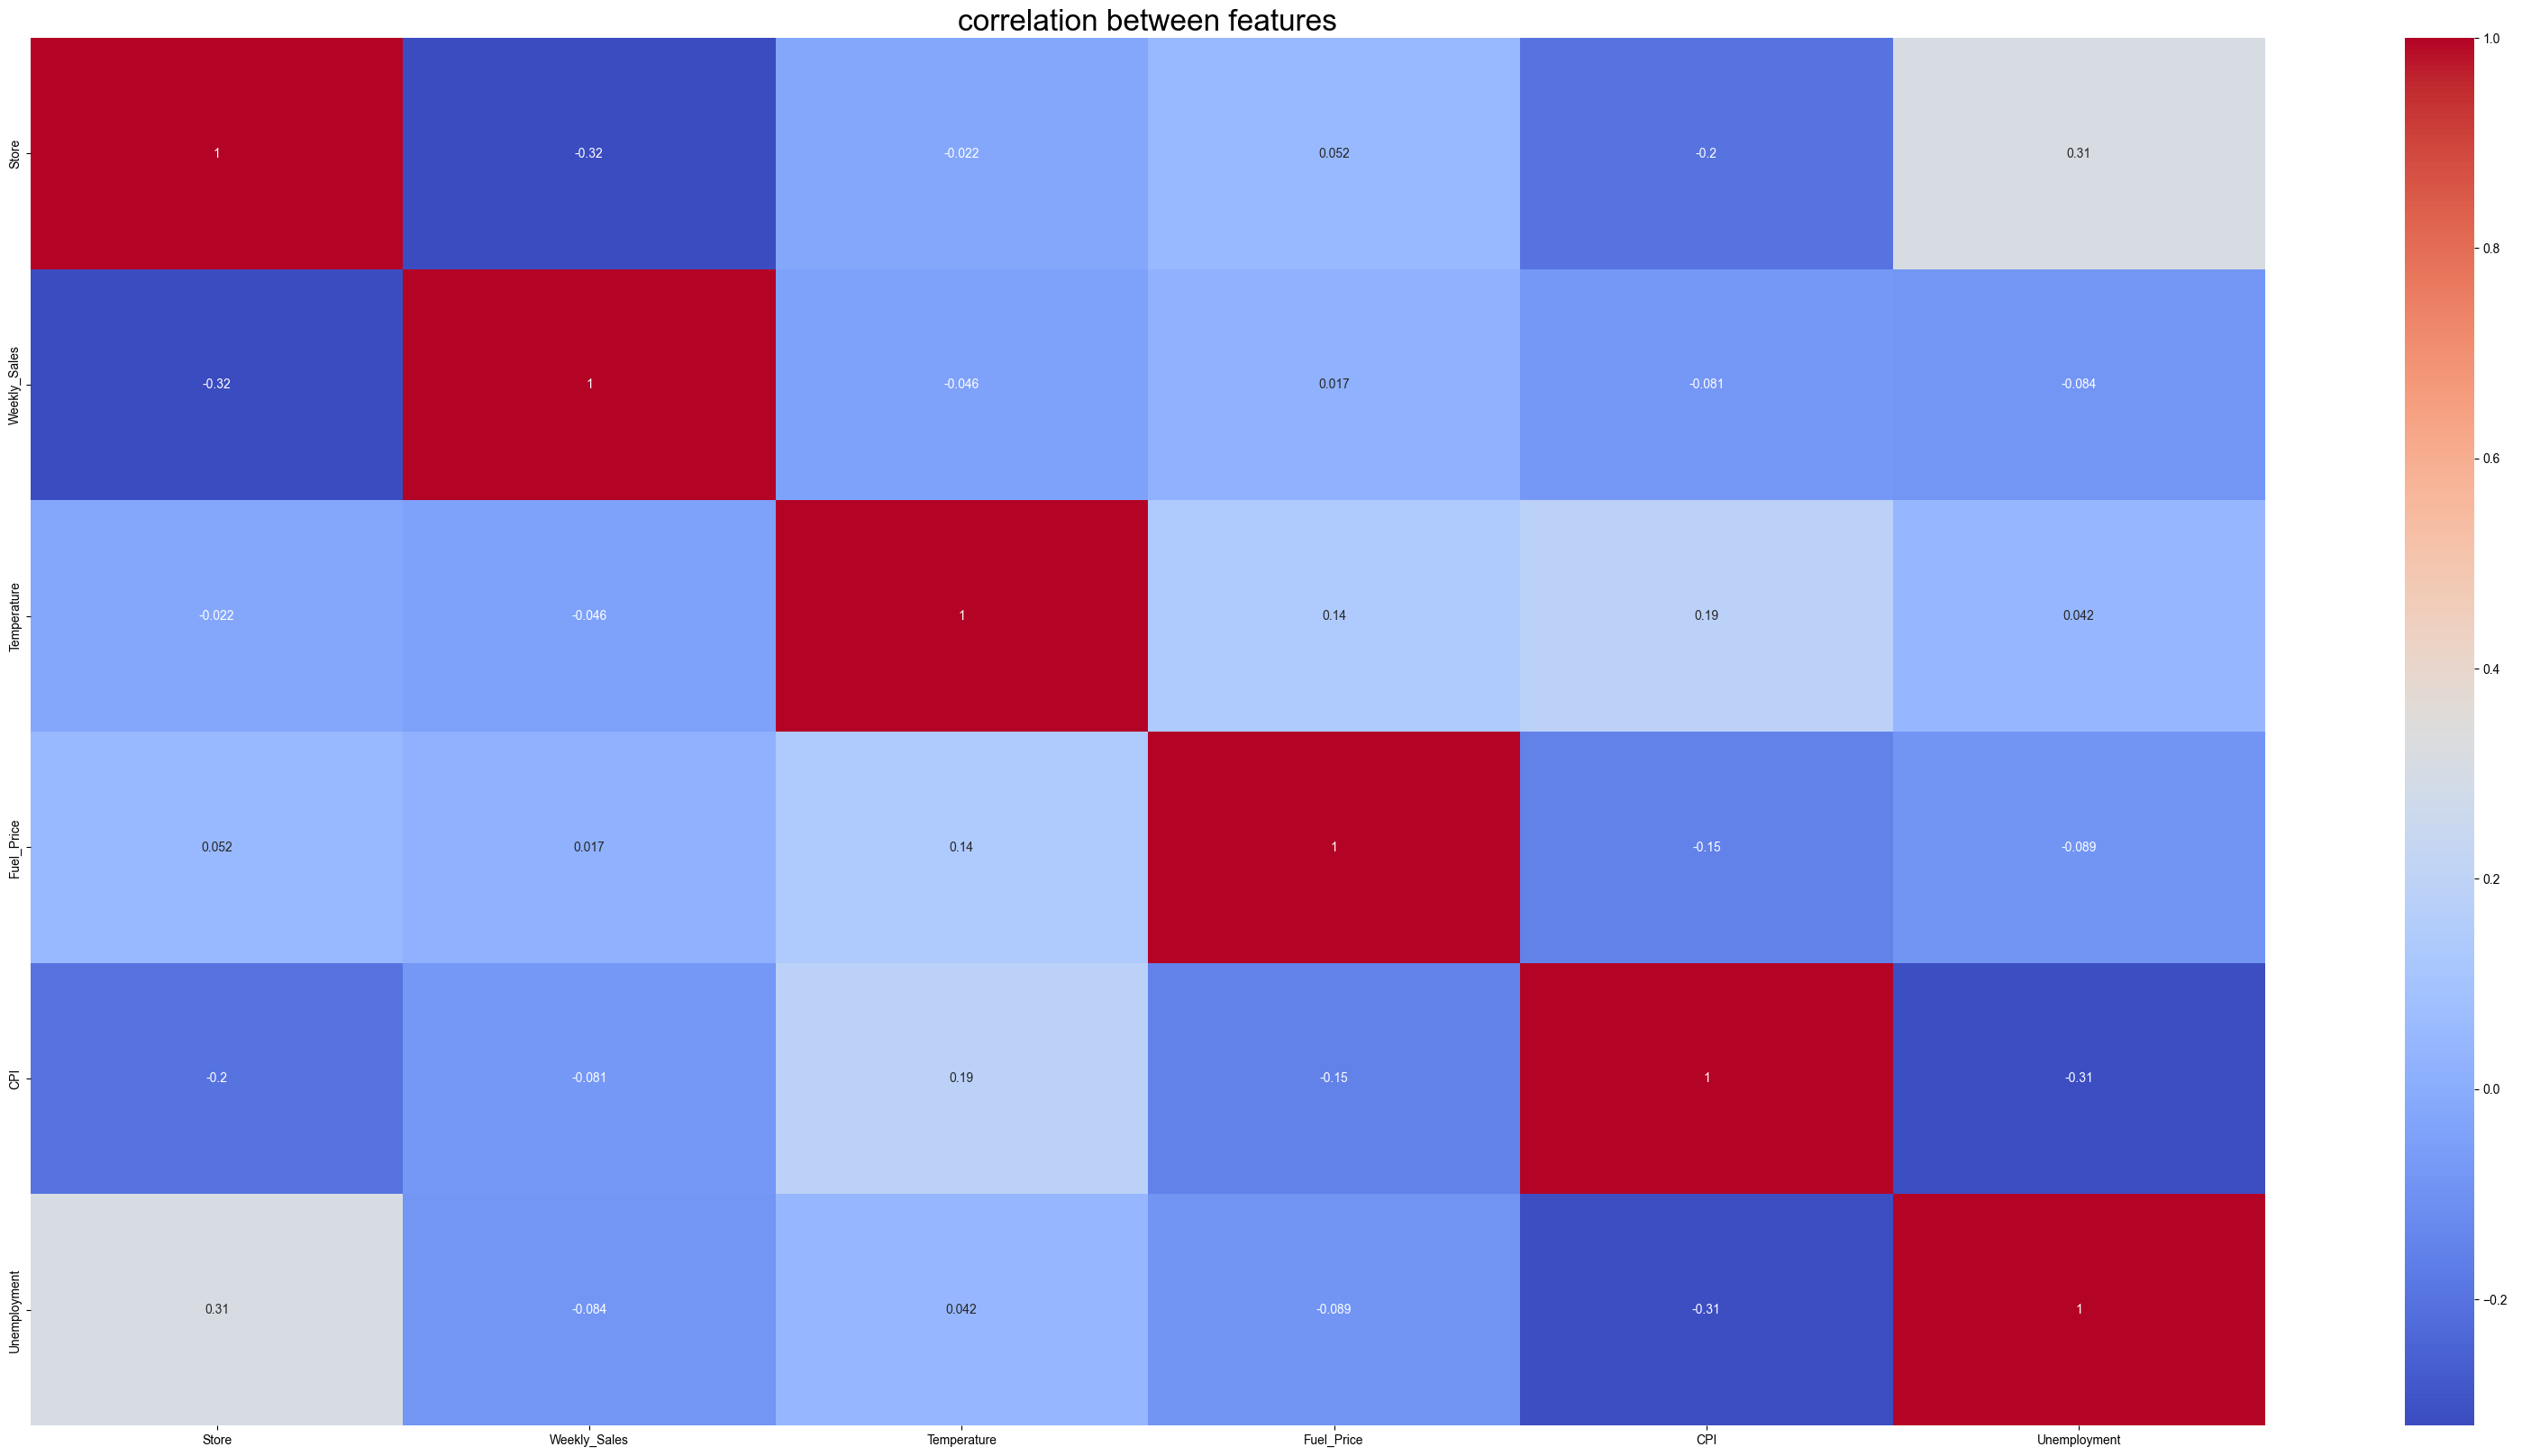

In [18]:
plt.figure(figsize = (40,20))
sns.heatmap(Sales_df.corr(),annot = True , cmap ="coolwarm")
sns.set(font_scale=2)
plt.title("correlation between features")
## From the heatmap we can easily see that there is no feature having correlation greater than 0.90 or 90%. 
## So we won't be eliminating any feature. 

In [19]:
## Standard feature scaling
## Droping the date column, this done because the date column cannot be into float for standardization.


In [20]:
x = Sales_df.drop(columns="Weekly_Sales")
x.head


<bound method NDFrame.head of       Store  Temperature  Fuel_Price         CPI  Unemployment
0         5        42.31       2.720  211.096358         8.106
1         5        38.51       2.720  211.242170         8.106
2         5        39.93       2.720  211.289143         8.106
3         5        46.63       2.720  211.319643         8.106
4         5        46.50       2.720  211.350143         8.106
...     ...          ...         ...         ...           ...
6430     41        64.88       3.916  192.013558         8.684
6431     41        64.89       3.916  192.170412         8.667
6432     41        54.47       3.916  192.327265         8.667
6433     41        56.47       3.916  192.330854         8.667
6434     41        58.85       3.882  192.308899         8.667

[6435 rows x 5 columns]>

In [21]:
y = Sales_df["Weekly_Sales"]
y.head

<bound method NDFrame.head of 0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64>

In [22]:
#importing Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(x)


In [24]:
## After Standardisation of data I will split the data in traing and testing set

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y , test_size=0.2)
x_train.shape
x_test.shape

(1287, 5)

In [26]:
####Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error



In [28]:
LinearReg= LinearRegression()
LinearReg.fit(x_train,y_train)
LinearRegression()
Sales_predict_LinearReg = LinearReg.predict(x_test)

In [29]:
LinearRegression=(Sales_predict_LinearReg)

In [30]:
mean_squared_error(y_test , Sales_predict_LinearReg )

223918232911.80264

In [31]:
r2_score(y_test , Sales_predict_LinearReg )

0.12050282358996389

In [32]:
######## Desicion Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
DecTree =  DecisionTreeRegressor()
DecTree .fit(x_train,y_train)
DecisionTreeRegressor()
Sales_predict_DecTree = DecTree .predict(x_test)


In [34]:
DecisionTree=(Sales_predict_DecTree)

In [35]:
mean_squared_error(y_test , Sales_predict_DecTree)


21314451808.39678

In [36]:
r2_score(y_test , Sales_predict_DecTree)

0.9162819394452953